In [43]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from datetime import datetime
# Set display options to show all columns
pd.set_option('display.max_columns', None)
from sklearn.calibration import LabelEncoder

df = pd.read_csv('../Data Sets/bus_stop_times_feature_added_all.csv')

In [44]:
df.head()

,trip_id,deviceid,direction,bus_stop,date,arrival_time,departure_time,dwell_time,dwell_time_in_seconds_old,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),hour_of_day,day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds
0,1,262,1,101,2021-10-01,06:40:58,06:42:12,0:01:14,74.0,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,6,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0
1,1,262,1,102,2021-10-01,06:45:42,06:45:42,0:00:00,0.0,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,6,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0
2,1,262,1,103,2021-10-01,06:53:58,06:54:04,0:00:06,6.0,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,6,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0
3,1,262,1,104,2021-10-01,06:57:19,06:57:19,0:00:00,0.0,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,6,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0
4,1,262,1,105,2021-10-01,06:58:56,07:02:27,0:03:31,211.0,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,6,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0


In [45]:
unique_values_count = df['deviceid'].nunique()
print("Number of unique values:", unique_values_count)

Number of unique values: 26


In [46]:
#get all the column name
df.columns

Index(['trip_id', 'deviceid', 'direction', 'bus_stop', 'date', 'arrival_time',
       'departure_time', 'dwell_time', 'dwell_time_in_seconds_old',
       'day_of_week', 'time_of_day', 'Sunday/holiday', 'saturday',
       'weekday/end', 'week_no', 'dt(w-1)', 'dt(w-2)', 'dt(w-3)', 'dt(t-1)',
       'dt(t-2)', 'dt(n-1)', 'dt(n-2)', 'dt(n-3)', 'hour_of_day', 'day',
       'month', 'temp', 'precip', 'windspeed', 'conditions', 'rt(n-1)',
       'stop_type', 'dwell_time_in_seconds'],
      dtype='object')

In [47]:
# drop a list of columns
dropList=['departure_time','dwell_time','dwell_time_in_seconds_old','hour_of_day']
df=df.drop(dropList,axis=1)

In [48]:
df['date'] = pd.to_datetime(df['date'])
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%H:%M:%S')


In [49]:
df = df.sort_values(by=['date', 'arrival_time'], ascending=True)

df.reset_index(drop=True, inplace=True)


In [50]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Drop the original date column
df.drop('date', axis=1, inplace=True)

In [51]:

df['arrival_hour'] = df['arrival_time'].dt.hour
df['arrival_min'] = df['arrival_time'].dt.minute
df['arrival_sec'] = df['arrival_time'].dt.second



In [52]:
df["arrival_time"]

0       1900-01-01 06:40:58
1       1900-01-01 06:45:42
2       1900-01-01 06:53:58
3       1900-01-01 06:57:19
4       1900-01-01 06:58:56
                ...        
91678   1900-01-01 18:47:38
91679   1900-01-01 18:50:08
91680   1900-01-01 18:52:39
91681   1900-01-01 18:55:01
91682   1900-01-01 18:56:55
Name: arrival_time, Length: 91683, dtype: datetime64[ns]

In [53]:
# Drop the original date column
df.drop('arrival_time', axis=1, inplace=True)

In [54]:


df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,1,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,Partially cloudy,69.0,pro,74.0,2021,6,40,58
1,1,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,Partially cloudy,210.0,mod,0.0,2021,6,45,42
2,1,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,Partially cloudy,496.0,mod,6.0,2021,6,53,58
3,1,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,Partially cloudy,195.0,br,0.0,2021,6,57,19
4,1,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,Partially cloudy,97.0,pro,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91678,25370,121,1,110,1,18.75,0,0,1,42,18.0,15.0,18.0,18.0,15.0,34.0,0.0,10.0,1,11,20.5,0.0,8.3,Overcast,134.0,mod,15.0,2022,18,47,38
91679,25370,121,1,111,1,18.75,0,0,1,42,9.0,9.0,9.0,9.0,7.0,15.0,34.0,0.0,1,11,20.5,0.0,8.3,Overcast,135.0,br,7.0,2022,18,50,8
91680,25370,121,1,112,1,18.75,0,0,1,42,6.0,6.0,6.0,6.0,0.0,7.0,15.0,34.0,1,11,20.5,0.0,8.3,Overcast,144.0,br,11.0,2022,18,52,39
91681,25370,121,1,113,1,18.75,0,0,1,42,7.0,7.0,7.0,7.0,198.0,11.0,7.0,15.0,1,11,20.5,0.0,8.3,Overcast,131.0,mod,13.0,2022,18,55,1


In [55]:
# Columns to label encode
columns_to_encode = ['stop_type', 'conditions']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to selected columns
for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

In [56]:
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,1,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,1,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,1,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,1,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,1,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91678,25370,121,1,110,1,18.75,0,0,1,42,18.0,15.0,18.0,18.0,15.0,34.0,0.0,10.0,1,11,20.5,0.0,8.3,1,134.0,1,15.0,2022,18,47,38
91679,25370,121,1,111,1,18.75,0,0,1,42,9.0,9.0,9.0,9.0,7.0,15.0,34.0,0.0,1,11,20.5,0.0,8.3,1,135.0,0,7.0,2022,18,50,8
91680,25370,121,1,112,1,18.75,0,0,1,42,6.0,6.0,6.0,6.0,0.0,7.0,15.0,34.0,1,11,20.5,0.0,8.3,1,144.0,0,11.0,2022,18,52,39
91681,25370,121,1,113,1,18.75,0,0,1,42,7.0,7.0,7.0,7.0,198.0,11.0,7.0,15.0,1,11,20.5,0.0,8.3,1,131.0,1,13.0,2022,18,55,1


## Using XG boost without clusters

In [57]:
from sklearn.model_selection import train_test_split

# Define features and target
features = df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
target = df['dwell_time_in_seconds']

# Filter data based on week_no condition
test_data = df[df['week_no'].isin([39, 40, 41, 42])]
train_data = df[~df['week_no'].isin([39, 40, 41, 42])]

# Split train and test data into features and target
X_train = train_data.drop(columns=['dwell_time_in_seconds']) 
y_train = train_data['dwell_time_in_seconds']
X_test = test_data.drop(columns=['dwell_time_in_seconds'])
y_test = test_data['dwell_time_in_seconds']




In [58]:
# Initialize XGBoost regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb1


model = xgb1.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')


KeyboardInterrupt: 

In [38]:
test_data

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
82131,23927,117,1,101,0,6.50,0,0,1,39,52.0,105.0,50.0,50.0,50.0,50.0,50.0,50.0,10,10,19.7,0.0,4.0,2,75.0,2,42.0,2022,6,31,53
82132,23927,117,1,102,0,6.50,0,0,1,39,90.0,15.0,15.0,26.0,26.0,42.0,26.0,26.0,10,10,19.7,0.0,4.0,2,321.0,1,15.0,2022,6,37,56
82133,23927,117,1,103,0,6.75,0,0,1,39,11.0,56.0,30.0,30.0,30.0,15.0,42.0,30.0,10,10,19.7,0.0,4.0,2,523.0,1,68.0,2022,6,46,54
82134,23927,117,1,104,0,6.75,0,0,1,39,0.0,0.0,1.0,1.0,1.0,68.0,15.0,42.0,10,10,19.7,0.0,4.0,2,211.0,0,0.0,2022,6,51,33
82135,23927,117,1,105,0,6.75,0,0,1,39,15.0,15.0,15.0,47.0,47.0,0.0,68.0,15.0,10,10,19.7,0.0,4.0,2,123.0,2,15.0,2022,6,53,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91678,25370,121,1,110,1,18.75,0,0,1,42,18.0,15.0,18.0,18.0,15.0,34.0,0.0,10.0,1,11,20.5,0.0,8.3,1,134.0,1,15.0,2022,18,47,38
91679,25370,121,1,111,1,18.75,0,0,1,42,9.0,9.0,9.0,9.0,7.0,15.0,34.0,0.0,1,11,20.5,0.0,8.3,1,135.0,0,7.0,2022,18,50,8
91680,25370,121,1,112,1,18.75,0,0,1,42,6.0,6.0,6.0,6.0,0.0,7.0,15.0,34.0,1,11,20.5,0.0,8.3,1,144.0,0,11.0,2022,18,52,39
91681,25370,121,1,113,1,18.75,0,0,1,42,7.0,7.0,7.0,7.0,198.0,11.0,7.0,15.0,1,11,20.5,0.0,8.3,1,131.0,1,13.0,2022,18,55,1


In [39]:
#print each unique trip_id
test_data['trip_id'].unique()

array([23927, 23930, 23931, 23932, 23935, 23936, 23938, 23939, 23941,
       23943, 23948, 23949, 23952, 23953, 23954, 23956, 23957, 23958,
       23960, 23964, 23967, 23970, 23971, 23973, 23974, 23975, 23977,
       23978, 23983, 23984, 23985, 23987, 23988, 23989, 23991, 23992,
       23995, 24000, 24002, 24003, 24005, 24006, 24008, 24009, 24010,
       24013, 24018, 24020, 24021, 24023, 24024, 24026, 24027, 24028,
       24031, 24038, 24043, 24044, 24045, 24046, 24047, 24049, 24051,
       24054, 24055, 24057, 24058, 24063, 24066, 24068, 24069, 24071,
       24073, 24074, 24077, 24078, 24080, 24081, 24084, 24088, 24091,
       24092, 24093, 24094, 24096, 24097, 24099, 24102, 24103, 24112,
       24113, 24114, 24116, 24117, 24118, 24120, 24122, 24123, 24125,
       24126, 24127, 24134, 24137, 24140, 24141, 24142, 24143, 24145,
       24147, 24148, 24150, 24151, 24154, 24156, 24162, 24164, 24165,
       24166, 24167, 24169, 24171, 24173, 24175, 24176, 24177, 24178,
       24181, 24186,

In [40]:
import matplotlib.pyplot as plt

# take a copy of test_data dataframe
visualize_data = test_data.copy()
visualize_data['predicted_dwell_time'] = predictions




# Construct a custom datetime format based on your column order
datetime_format = "%Y %m %d %H %M %S"

# Convert the columns to a single combined datetime column
visualize_data['combined_datetime'] = pd.to_datetime(
    visualize_data[['year', 'month', 'day', 'arrival_hour', 'arrival_min', 'arrival_sec']]
    .astype(str)
    .apply(' '.join, axis=1),
    format=datetime_format
)


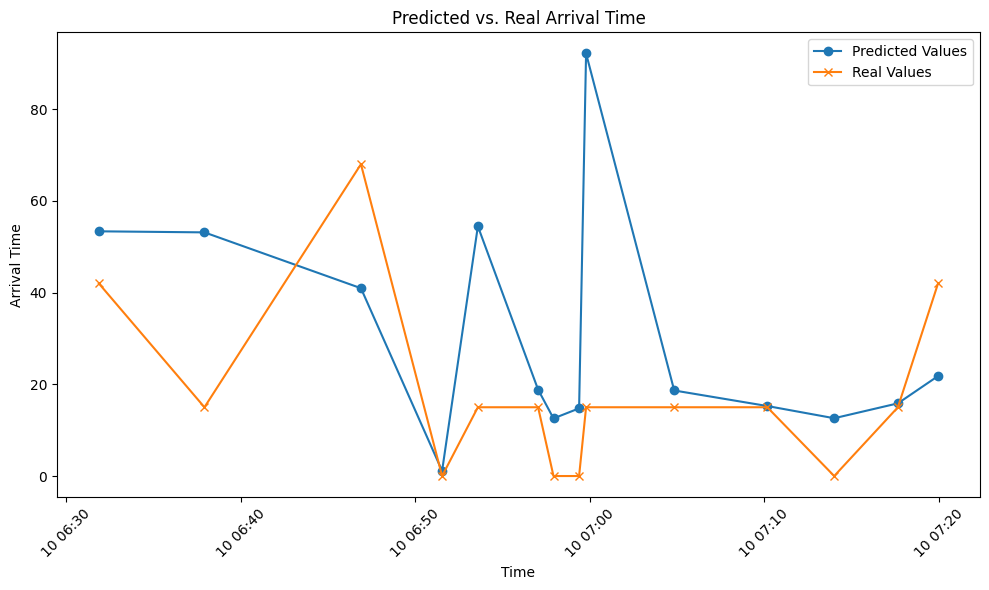

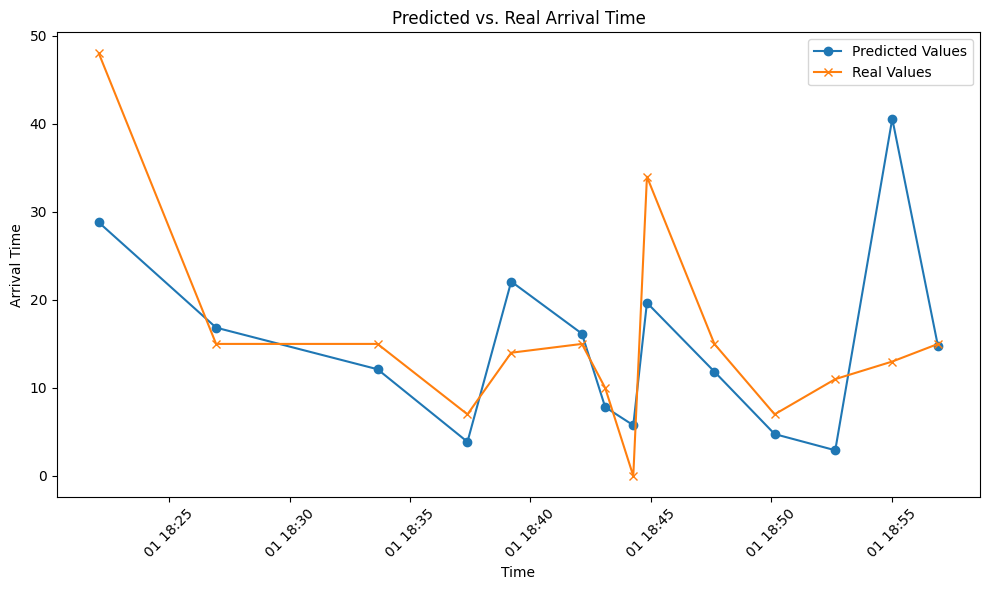

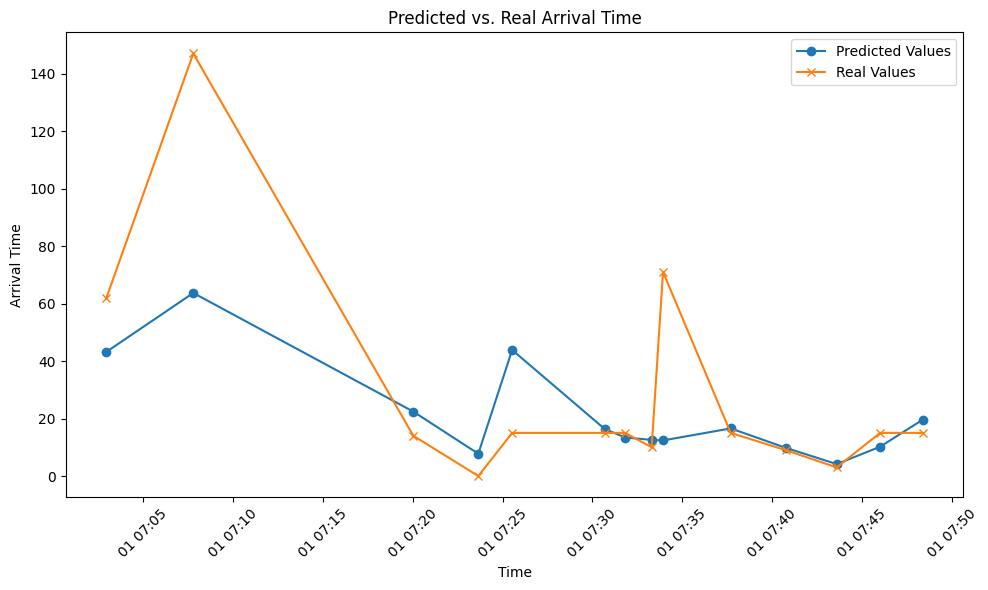

In [41]:

trip_id_list=[23927,25370,25314]

for trips in trip_id_list:
    specific_busID_df = visualize_data[(visualize_data['trip_id'] == trips)]


    # Assuming you have arrays or Series for predicted values and real values
    predicted_values = specific_busID_df['predicted_dwell_time']  # Replace with your predicted values
    real_values = specific_busID_df['dwell_time_in_seconds']  # Replace with your real values

    plt.figure(figsize=(10, 6))
    plt.plot(specific_busID_df['combined_datetime'], predicted_values, label='Predicted Values', marker='o')
    plt.plot(specific_busID_df['combined_datetime'], real_values, label='Real Values', marker='x')
    plt.xlabel('Time')
    plt.ylabel('Arrival Time')
    plt.title('Predicted vs. Real Arrival Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


## Using XG boost with clusters

In [42]:
df

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
0,1,262,1,101,4,6.50,0,0,1,1,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,1,10,20.0,0.0,6.1,2,69.0,2,74.0,2021,6,40,58
1,1,262,1,102,4,6.75,0,0,1,1,45.0,45.0,45.0,45.0,45.0,74.0,45.0,45.0,1,10,20.0,0.0,6.1,2,210.0,1,0.0,2021,6,45,42
2,1,262,1,103,4,6.75,0,0,1,1,28.0,28.0,28.0,28.0,28.0,0.0,74.0,28.0,1,10,20.0,0.0,6.1,2,496.0,1,6.0,2021,6,53,58
3,1,262,1,104,4,6.75,0,0,1,1,1.0,1.0,1.0,1.0,1.0,6.0,0.0,74.0,1,10,20.0,0.0,6.1,2,195.0,0,0.0,2021,6,57,19
4,1,262,1,105,4,6.75,0,0,1,1,230.0,230.0,230.0,230.0,230.0,0.0,6.0,0.0,1,10,20.0,0.0,6.1,2,97.0,2,211.0,2021,6,58,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91678,25370,121,1,110,1,18.75,0,0,1,42,18.0,15.0,18.0,18.0,15.0,34.0,0.0,10.0,1,11,20.5,0.0,8.3,1,134.0,1,15.0,2022,18,47,38
91679,25370,121,1,111,1,18.75,0,0,1,42,9.0,9.0,9.0,9.0,7.0,15.0,34.0,0.0,1,11,20.5,0.0,8.3,1,135.0,0,7.0,2022,18,50,8
91680,25370,121,1,112,1,18.75,0,0,1,42,6.0,6.0,6.0,6.0,0.0,7.0,15.0,34.0,1,11,20.5,0.0,8.3,1,144.0,0,11.0,2022,18,52,39
91681,25370,121,1,113,1,18.75,0,0,1,42,7.0,7.0,7.0,7.0,198.0,11.0,7.0,15.0,1,11,20.5,0.0,8.3,1,131.0,1,13.0,2022,18,55,1


In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
features = df.drop(['dwell_time_in_seconds'], axis=1)  # Drop the target feature
target = df['dwell_time_in_seconds']

# Filter data based on week_no condition
test_data = df[df['week_no'].isin([39, 40, 41, 42])]
train_data = df[~df['week_no'].isin([39, 40, 41, 42])]

# Split train and test data into features and target
X_train = train_data.drop(columns=['dwell_time_in_seconds']) 
y_train = train_data['dwell_time_in_seconds']
X_test = test_data.drop(columns=['dwell_time_in_seconds'])
y_test = test_data['dwell_time_in_seconds']




In [ ]:
# Initialize XGBoost regressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import xgboost as xgb


model = xgb.XGBRegressor(colsample_bytree = 0.7, learning_rate = 0.1,max_depth = 6, alpha = 10, n_estimators = 1000)

# Train the model on the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = model.predict(X_test)

# Evaluate the model's performance
mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Square Error: {rmse}')


Mean Absolute Error: 14.583893816363748
Root Mean Square Error: 28.88489002593539


In [ ]:
test_data

,trip_id,deviceid,direction,bus_stop,day_of_week,time_of_day,Sunday/holiday,saturday,weekday/end,week_no,dt(w-1),dt(w-2),dt(w-3),dt(t-1),dt(t-2),dt(n-1),dt(n-2),dt(n-3),day,month,temp,precip,windspeed,conditions,rt(n-1),stop_type,dwell_time_in_seconds,year,arrival_hour,arrival_min,arrival_sec
82131,23927,117,1,101,0,6.50,0,0,1,39,52.0,105.0,50.0,50.0,50.0,50.0,50.0,50.0,10,10,19.7,0.0,4.0,2,75.0,2,42.0,2022,6,31,53
82132,23927,117,1,102,0,6.50,0,0,1,39,90.0,15.0,15.0,26.0,26.0,42.0,26.0,26.0,10,10,19.7,0.0,4.0,2,321.0,1,15.0,2022,6,37,56
82133,23927,117,1,103,0,6.75,0,0,1,39,11.0,56.0,30.0,30.0,30.0,15.0,42.0,30.0,10,10,19.7,0.0,4.0,2,523.0,1,68.0,2022,6,46,54
82134,23927,117,1,104,0,6.75,0,0,1,39,0.0,0.0,1.0,1.0,1.0,68.0,15.0,42.0,10,10,19.7,0.0,4.0,2,211.0,0,0.0,2022,6,51,33
82135,23927,117,1,105,0,6.75,0,0,1,39,15.0,15.0,15.0,47.0,47.0,0.0,68.0,15.0,10,10,19.7,0.0,4.0,2,123.0,2,15.0,2022,6,53,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91678,25370,121,1,110,1,18.75,0,0,1,42,18.0,15.0,18.0,18.0,15.0,34.0,0.0,10.0,1,11,20.5,0.0,8.3,1,134.0,1,15.0,2022,18,47,38
91679,25370,121,1,111,1,18.75,0,0,1,42,9.0,9.0,9.0,9.0,7.0,15.0,34.0,0.0,1,11,20.5,0.0,8.3,1,135.0,0,7.0,2022,18,50,8
91680,25370,121,1,112,1,18.75,0,0,1,42,6.0,6.0,6.0,6.0,0.0,7.0,15.0,34.0,1,11,20.5,0.0,8.3,1,144.0,0,11.0,2022,18,52,39
91681,25370,121,1,113,1,18.75,0,0,1,42,7.0,7.0,7.0,7.0,198.0,11.0,7.0,15.0,1,11,20.5,0.0,8.3,1,131.0,1,13.0,2022,18,55,1


In [ ]:
#print each unique trip_id
test_data['trip_id'].unique()

array([23927, 23930, 23931, 23932, 23935, 23936, 23938, 23939, 23941,
       23943, 23948, 23949, 23952, 23953, 23954, 23956, 23957, 23958,
       23960, 23964, 23967, 23970, 23971, 23973, 23974, 23975, 23977,
       23978, 23983, 23984, 23985, 23987, 23988, 23989, 23991, 23992,
       23995, 24000, 24002, 24003, 24005, 24006, 24008, 24009, 24010,
       24013, 24018, 24020, 24021, 24023, 24024, 24026, 24027, 24028,
       24031, 24038, 24043, 24044, 24045, 24046, 24047, 24049, 24051,
       24054, 24055, 24057, 24058, 24063, 24066, 24068, 24069, 24071,
       24073, 24074, 24077, 24078, 24080, 24081, 24084, 24088, 24091,
       24092, 24093, 24094, 24096, 24097, 24099, 24102, 24103, 24112,
       24113, 24114, 24116, 24117, 24118, 24120, 24122, 24123, 24125,
       24126, 24127, 24134, 24137, 24140, 24141, 24142, 24143, 24145,
       24147, 24148, 24150, 24151, 24154, 24156, 24162, 24164, 24165,
       24166, 24167, 24169, 24171, 24173, 24175, 24176, 24177, 24178,
       24181, 24186,

In [ ]:
import matplotlib.pyplot as plt

# take a copy of test_data dataframe
visualize_data = test_data.copy()
visualize_data['predicted_dwell_time'] = predictions




# Construct a custom datetime format based on your column order
datetime_format = "%Y %m %d %H %M %S"

# Convert the columns to a single combined datetime column
visualize_data['combined_datetime'] = pd.to_datetime(
    visualize_data[['year', 'month', 'day', 'arrival_hour', 'arrival_min', 'arrival_sec']]
    .astype(str)
    .apply(' '.join, axis=1),
    format=datetime_format
)


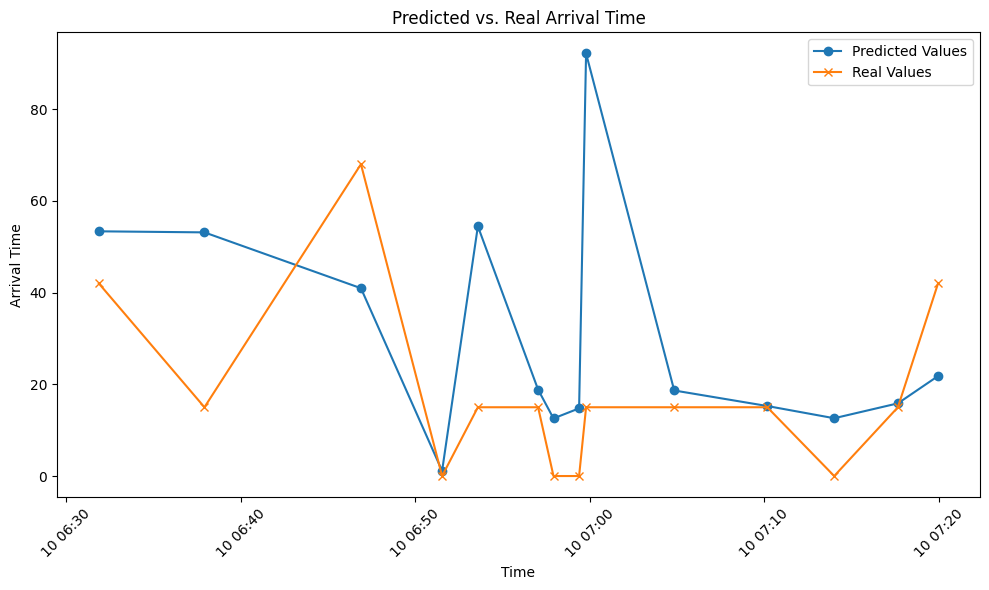

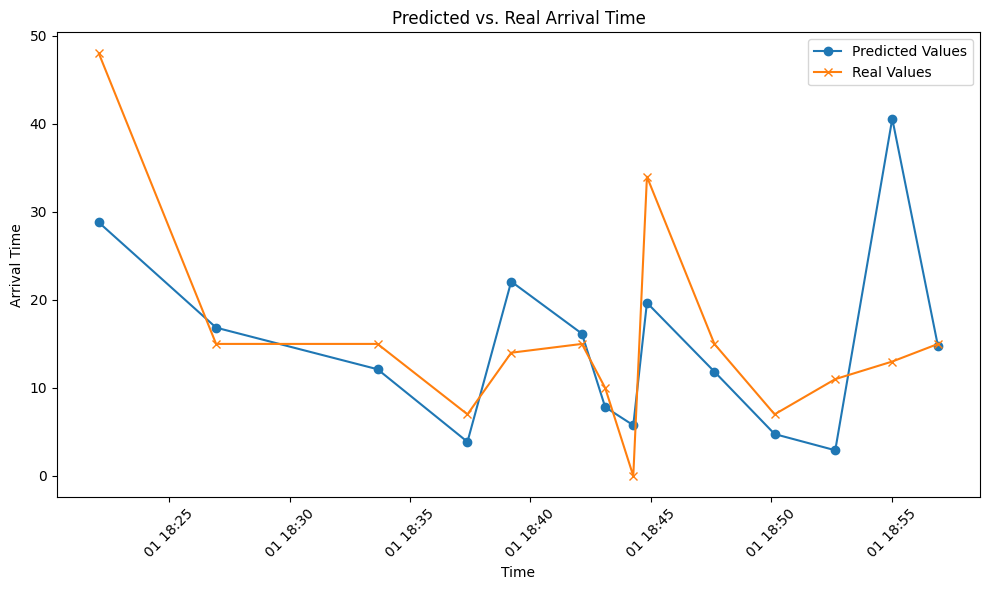

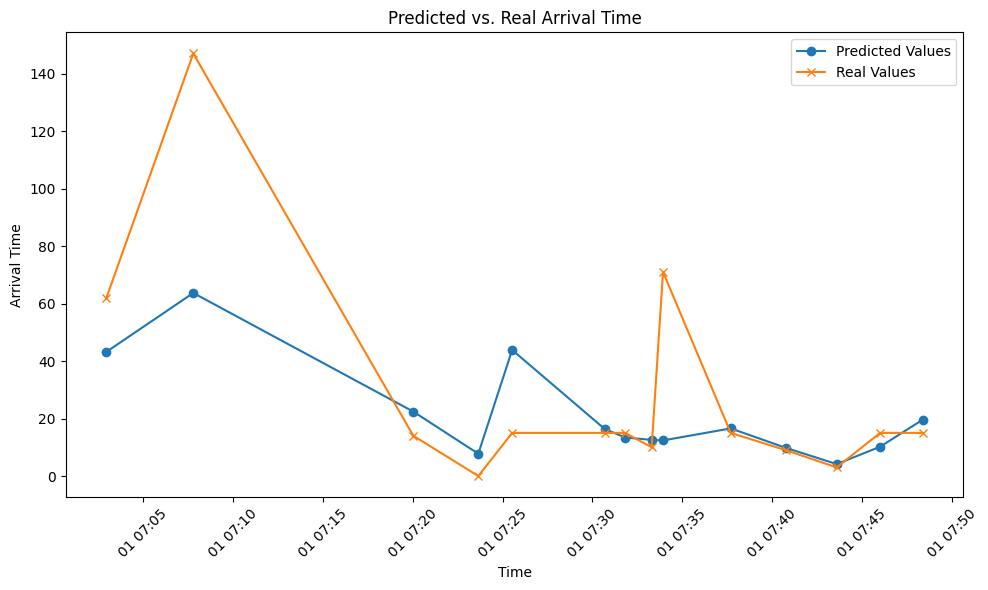

In [ ]:

trip_id_list=[23927,25370,25314]

for trips in trip_id_list:
    specific_busID_df = visualize_data[(visualize_data['trip_id'] == trips)]


    # Assuming you have arrays or Series for predicted values and real values
    predicted_values = specific_busID_df['predicted_dwell_time']  # Replace with your predicted values
    real_values = specific_busID_df['dwell_time_in_seconds']  # Replace with your real values

    plt.figure(figsize=(10, 6))
    plt.plot(specific_busID_df['combined_datetime'], predicted_values, label='Predicted Values', marker='o')
    plt.plot(specific_busID_df['combined_datetime'], real_values, label='Real Values', marker='x')
    plt.xlabel('Time')
    plt.ylabel('Arrival Time')
    plt.title('Predicted vs. Real Arrival Time')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
